# SYDE 556/750 --- Assignment 2
**Student ID: 20883350**

*Note:* Please include your numerical student ID only, do *not* include your name.

*Note:* Refer to the [PDF](https://github.com/celiasmith/syde556-f22/raw/master/assignments/assignment_02/syde556_assignment_02.pdf) for the full instructions (including some hints), this notebook contains abbreviated instructions only. Cells you need to fill out are marked with a "writing hand" symbol. Of course, you can add new cells in between the instructions, but please leave the instructions intact to facilitate marking.

In [1]:
# Import numpy and matplotlib -- you shouldn't need any other libraries
import numpy as np
import matplotlib.pyplot as plt

# Fix the numpy random seed for reproducible results
np.random.seed(18800)

# Some formating options
%config InlineBackend.figure_formats = ['svg']

# 1. Generating a random input signal

## 1.1 Band-limited white noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with $\texttt{limit}$ at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

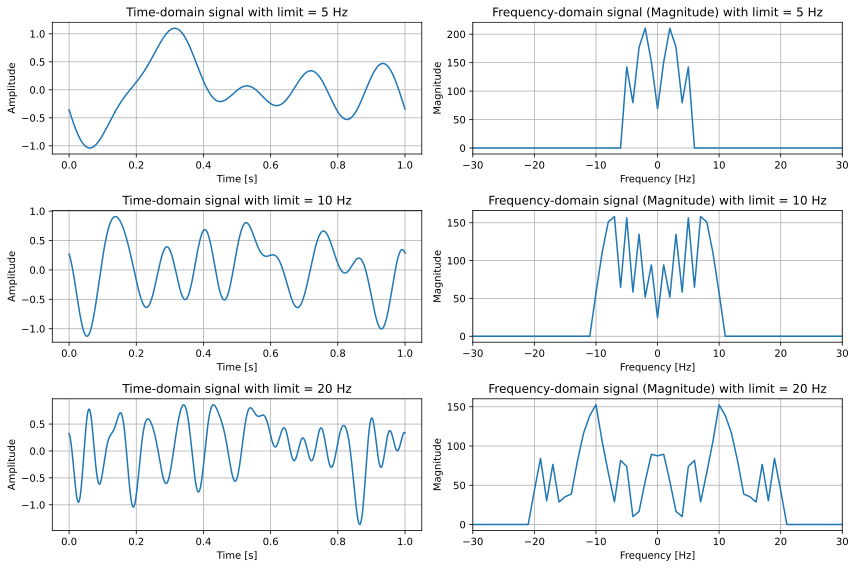

In [2]:
def generate_signal_limit(T, dt, rms, limit, seed):
    np.random.seed(seed)

    # change the frequency in hz to rad/s
    limit_w = 2 * np.pi * limit
    
    n_samples = int(T / dt)
    t_samples = np.linspace(0, T, n_samples)

    # find the frequencies which python will sample
    w_freq = 2 * np.pi * np.fft.fftfreq(n_samples, d=dt)

    # create an empty frequency signal
    signal_w = np.zeros(n_samples, dtype=complex)

    # at each frequency, sample a complex number X(w); only do it for the positive frequencies
    for i, w in enumerate(w_freq[:n_samples // 2]):
        if w <= limit_w:
            signal_w[i] = np.random.normal(0, 1) + 1j * np.random.normal(0, 1)
        # if the frequency is greater, leave the signal value at 0
    
    # make sure we only have real components
    # that is, we want X(w) = conj(X(-w))
    # we have X(w) thus we want conj(X(-w)) = X(w) => X(-w) = conj(X(w))
    # thus negative freq vals = conj positive freq vals
    signal_w[n_samples // 2 + 1:] = np.conj(signal_w[1:n_samples//2][::-1])
    
    # Inverse Fourier transform to get the time-domain signal
    signal_t = np.fft.ifft(signal_w).real
    
    # calculate the current rms of the generated signal
    curr_rms = np.sqrt(np.mean(signal_t**2))
    # we want the final rms to be rms
    # thus we want: rms = factor * curr_rms => factor = rms / curr_rms
    factor = rms / curr_rms
    signal_t *= factor
    signal_w *= factor

    # correctly shift the frequencies to 0-centrered
    w_freq = np.fft.fftshift(w_freq)
    signal_w = np.fft.fftshift(signal_w)
    
    return {"t": [t_samples, signal_t], "w": [w_freq, signal_w]}

# Parameters for the signals
T = 1.0        # 1 second duration
dt = 0.001     # 1 ms time step
rms = 0.5      # Desired RMS power
seeds = [8, 9, 10]  # Different seeds for each case

# Frequency limits
limits = [5, 10, 20]  # Frequency limits in Hz

# Generate and plot signals for different frequency limits
plt.figure(figsize=(12, 8))

for i, limit in enumerate(limits):
    signal_dict = generate_signal_limit(T, dt, rms, limit, seeds[i])
    
    # Plot the time-domain signal (left subplot)
    plt.subplot(3, 2, 2 * i + 1)
    plt.plot(*signal_dict["t"])
    plt.title(f'Time-domain signal with limit = {limit} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the frequency-domain (Fourier magnitude) signal (right subplot)
    plt.subplot(3, 2, 2 * i + 2)
    plt.plot(signal_dict["w"][0] / (2*np.pi), np.abs(signal_dict["w"][1]))
    plt.title(f'Frequency-domain signal (Magnitude) with limit = {limit} Hz')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.grid(True)
    plt.xlim(-30, 30)

plt.tight_layout()
plt.show()

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=10\,\mathrm{Hz}$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

In [3]:
T = 1
dt = 0.001
rms = 0.5
limit = 10
n_signals = 100

signals_w = []
w_freq = None
for i in range(n_signals):
    signal_dict = generate_signal_limit(T, dt, rms, limit, i+1000)
    signals_w.append(np.array(signal_dict["w"][1]))

    if w_freq is None:
        # only write frequencies once since they won't vary
        w_freq = signal_dict["w"][0]

signals_w = np.array(signals_w)
w_freq = np.array(w_freq)
signals_w.shape, w_freq.shape


((100, 1000), (1000,))

In [4]:
# take the average over each of the 100 samples for each frequency
signal_w_avg_norm = np.mean(np.abs(signals_w), axis=0)
signal_w_avg_norm.shape

(1000,)

(-100.0, 100.0)

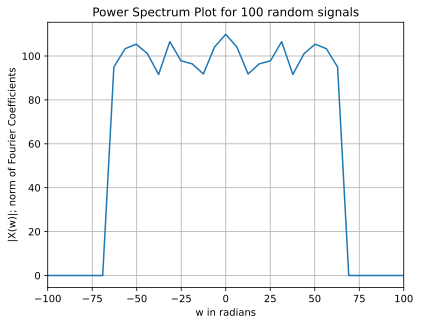

In [5]:
# shifted_freqs = np.fft.fftshift(w_freq)
# signal_w_avg_norm_shifted = np.fft.fftshift(signal_w_avg_norm)
plt.plot(w_freq, np.abs(signal_w_avg_norm))
plt.title(f'Power Spectrum Plot for 100 random signals')
plt.xlabel('w in radians')
plt.ylabel('|X(w)|; norm of Fourier Coefficients')
plt.grid(True)
plt.xlim(-100, 100)

(-20.0, 20.0)

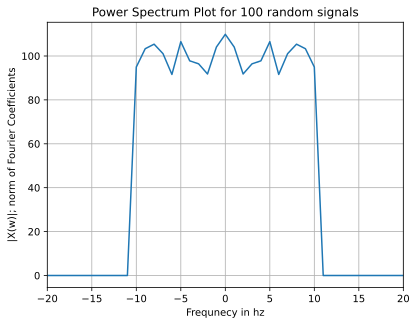

In [6]:
# confirm that it looks correc by plotting in hz and checking the band limit
plt.plot(w_freq / (2*np.pi), signal_w_avg_norm)
plt.title(f'Power Spectrum Plot for 100 random signals')
plt.xlabel('Frequnecy in hz')
plt.ylabel('|X(w)|; norm of Fourier Coefficients')
plt.grid(True)
plt.xlim(-20, 20)

## 1.2 Gaussian power spectrum noise

**a) Time-domain signals.** Plot $x(t)$ for three randomly generated signals with `bandwidth` at $5$, $10$, and $20\,\mathrm{Hz}$. For each of these, $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$ and $\mathtt{rms}=0.5$.

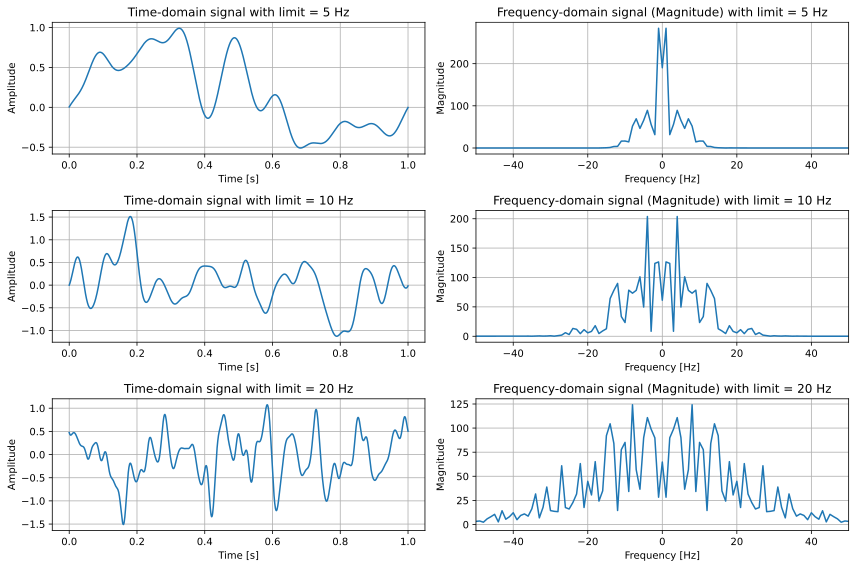

In [7]:
def generate_signal_bw(T, dt, rms, bandwidth, seed):
    np.random.seed(seed)

    b_rad = 2 * np.pi * bandwidth
    
    n_samples = int(T / dt)
    t_samples = np.linspace(0, T, n_samples)

    # find the frequencies which python will sample
    w_freq = 2 * np.pi * np.fft.fftfreq(n_samples, d=dt)

    # create an empty frequency signal
    signal_w = np.zeros(n_samples, dtype=complex)

    # at each frequency, sample a complex number X(w); only do it for the positive frequencies
    for i, w in enumerate(w_freq[:n_samples // 2]):
        sigma = np.exp(-w**2 / (2*(b_rad**2)))
        signal_w[i] = np.random.normal(0, sigma) + 1j * np.random.normal(0, sigma)
    
    # make sure we only have real components
    # that is, we want X(w) = conj(X(-w))
    signal_w[n_samples // 2 + 1:] = np.conj(signal_w[1:n_samples//2][::-1])
    
    # Inverse Fourier transform to get the time-domain signal
    signal_t = np.fft.ifft(signal_w).real
    
    # calculate the current rms of the generated signal
    curr_rms = np.sqrt(np.mean(signal_t**2))
    # we want the final rms to be rms
    # thus we want: rms = factor * curr_rms => factor = rms / curr_rms
    factor = rms / curr_rms
    signal_t *= factor
    signal_w *= factor

    # correctly shift the frequencies to 0-centrered
    w_freq = np.fft.fftshift(w_freq)
    signal_w = np.fft.fftshift(signal_w)
    
    return {"t": [t_samples, signal_t], "w": [w_freq, signal_w]}

# Parameters for the signals
T = 1.0
dt = 0.001
rms = 0.5      
seeds = [11, 12, 13]  # Different seeds for each case

# Frequency limits
bws = [5, 10, 20]  # bandwidth in Hz

# Generate and plot signals for different frequency limits
plt.figure(figsize=(12, 8))

for i, bw in enumerate(bws):
    signal_dict = generate_signal_bw(T, dt, rms, bw, seeds[i])
    
    # Plot the time-domain signal (left subplot)
    plt.subplot(3, 2, 2 * i + 1)
    plt.plot(*signal_dict["t"])
    plt.title(f'Time-domain signal with limit = {bw} Hz')
    plt.xlabel('Time [s]')
    plt.ylabel('Amplitude')
    plt.grid(True)
    
    # Plot the frequency-domain (Fourier magnitude) signal (right subplot)
    plt.subplot(3, 2, 2 * i + 2)
    # shifted_freqs = np.fft.fftshift(signal_dict["w"][0])
    # shifted_signal_w = np.fft.fftshift(signal_dict["w"][1])
    # plt.plot(shifted_freqs / (2*np.pi), np.abs(shifted_signal_w))
    plt.plot(signal_dict["w"][0] / (2*np.pi), np.abs(signal_dict["w"][1])) 
    plt.title(f'Frequency-domain signal (Magnitude) with limit = {bw} Hz')
    plt.xlabel('Frequency [Hz]')
    plt.ylabel('Magnitude')
    plt.xlim(-50, 50)
    plt.grid(True)

plt.tight_layout()
plt.show()

**b) Average power spectrum.** Plot the average $|X(\omega)|$ (the norm of the Fourier coefficients, or “power spectrum”) over $100$ signals generated with $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{bandwidth}=10$ (of course, each of these 100 signals should have a different `seed`). The plot should have the $x$-axis labeled “$\omega$ in radians” and the average $|X|$ value for that $\omega$ on the $y$-axis.

(-150.0, 150.0)

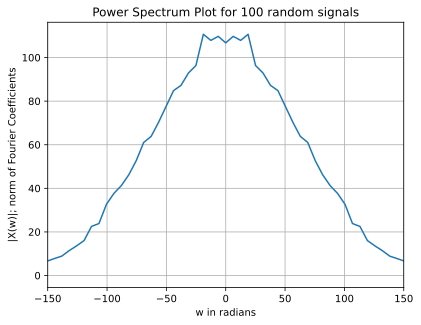

In [8]:
T = 1
dt = 0.001
rms = 0.5
bw = 10
n_signals = 100

signals_w = []
w_freq = None
for i in range(n_signals):
    signal_dict = generate_signal_bw(T, dt, rms, bw, i)
    signals_w.append(np.abs(np.array(signal_dict["w"][1])))

    if w_freq is None:
        # only write frequencies once since they won't vary
        w_freq = signal_dict["w"][0]

signals_w = np.array(signals_w)
w_freq = np.array(w_freq)

# take the average over each of the 100 samples for each frequency
signal_w_avg_norm = np.mean(signals_w, axis=0)

# shifted_freqs = np.fft.fftshift(w_freq)
# signal_w_avg_norm_shifted = np.fft.fftshift(signal_w_avg_norm)
plt.plot(w_freq, np.abs(signal_w_avg_norm))
# plt.plot(w_freq, signal_w_avg_norm)
plt.title(f'Power Spectrum Plot for 100 random signals')
plt.xlabel('w in radians')
plt.ylabel('|X(w)|; norm of Fourier Coefficients')
plt.grid(True)
plt.xlim(-150, 150)

(-50.0, 50.0)

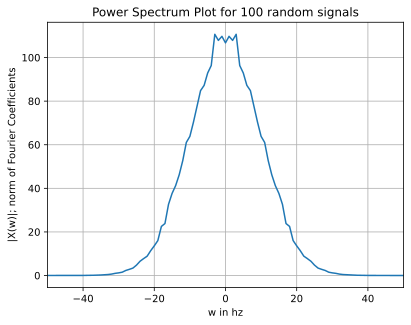

In [9]:
plt.plot(w_freq / (2*np.pi), np.abs(signal_w_avg_norm))
plt.title(f'Power Spectrum Plot for 100 random signals')
plt.xlabel('w in hz')
plt.ylabel('|X(w)|; norm of Fourier Coefficients')
plt.grid(True)
plt.xlim(-50, 50)

# 2. Simulating a spiking neuron

**a) Spike plots for constant inputs.** Plot the spike output for a constant input of $x=0$ over $1$ second. Report the number of spikes. Do the same thing for $x=1$. Use a time step of $\Delta t = 1\,\mathrm{ms}$ for the simulation.

In [10]:
# copy in a bunch of code from my assignment 1
class Neuron:
    # create a specialized neuron which accepts a1 for x = 0 and a2 for x = 1
    def __init__(self, y_intercept_rate, x_val, y_val, encoder):
        self.a1 = y_intercept_rate
        self.a2 = y_val
        self.x2 = x_val
        self.e = encoder

        self.J_bias = self.compute_J_bias()
        self.alpha = self.compute_alpha()
   
    def x_to_J(self, x_samples):
        # input variable to current
        return self.alpha * (np.dot(self.e, x_samples)) + self.J_bias
    
    def compute_J_bias(self):
        pass

    def compute_alpha(self):
        pass

    def compute_e(self):
        pass
    
    def compute_tuning_curve(self, x_samples):
        pass


class LIFNeuron1D(Neuron):
    def __init__(self, y_intercept_rate, x_val, y_val, tau_ref_ms, tau_rc_ms, encoder):
        self.tau_ref_s = tau_ref_ms / 1000
        self.tau_rc_s = tau_rc_ms / 1000
        super().__init__(y_intercept_rate, x_val, y_val, encoder)

    def compute_J_bias(self):
        # no alpha assumption
        return (1 / (1 - np.exp((self.tau_ref_s - (1/self.a1)) / self.tau_rc_s)))

    def compute_alpha(self):
        # assumes J bias exists
        return ((1 / (1 - np.exp((self.tau_ref_s - (1/self.a2)) / self.tau_rc_s))) - self.J_bias) / (self.x2)

    def compute_tuning_curve(self, x_samples):
        J = self.x_to_J(x_samples)
        J_safe = np.where(J > 1, J, np.nan)  # Replace invalid J values with NaN
        return np.where(J > 1, 1 / (self.tau_ref_s - self.tau_rc_s * np.log(1 - (1 / J_safe))), 0)

In [11]:
tau_rc_ms = 20
tau_ref_ms = 2
tau_ref_s = tau_ref_ms * 0.001
tau_rc_s = tau_rc_ms * 0.001
lif_neuron = LIFNeuron1D(40, 1, 150, tau_ref_ms, tau_rc_ms, 1)
lif_neuron.x_to_J(0)

1.4633506094428541

In [12]:
tau_rc_s, tau_ref_s

(0.02, 0.002)

In [13]:
def simulate_neuron(neuron, x_t, t_final):
    # create a script to run the simulation
    # TODO: consider makingn the top inputs parameters
    v_rest = 0
    v_curr = 0
    v_th = 1
    t = 0
    dt = 0.001
    # set to -1 when not running
    t_curr_ref = -1

    n_spikes = 0
    voltages = [v_curr]
    t_array = [t]

    while t < t_final:
        # check if a neuron is in refractory time
        if t_curr_ref >= 0:
            t_curr_ref += dt
            t += dt
            voltages.append(v_curr)
            t_array.append(t)

            # check if we reached limit
            if t_curr_ref >= tau_ref_s:
                # reset the refractory time to -1
                t_curr_ref = -1
            continue

        # check if a neuron has spiked 
        if v_curr == (1 / dt):
            v_curr = 0
            t_curr_ref = dt
            t += dt
            voltages.append(v_curr)
            t_array.append(t)
            continue


        # calculate the voltage change using neuron J and current v
        # assume that the input is sampled in ms.. so the input at index [ms] is the current value of the input
        input_idx = int(t * 1000)
        dv_dt = (1 / tau_rc_s) * (neuron.x_to_J(x_t[input_idx]) - v_curr)

        # get only voltage change by taking time into accont
        dv = dv_dt * dt

        # update the current voltage
        v_curr += dv

        # if it's negative, reset to 0
        if v_curr < v_rest:
            v_curr = v_rest

        # if it's above the voltage threshold, generate a spike - indicate refractory time
        if v_curr >= v_th:
            # generate a discrete impulse
            v_curr = (1 / dt)
            n_spikes += 1

        # update the time to next time stamp
        t += dt
        voltages.append(v_curr)
        t_array.append(t)

    print(f"The total number of spikes over {t_final} second is: {n_spikes}")
    return t_array, voltages

In [14]:
x_0 = np.zeros(int(1 / 0.001))
x_0.shape

(1000,)

In [15]:
t_array, voltages = simulate_neuron(lif_neuron, x_0, 1)

The total number of spikes over 1 second is: 40


In [16]:
def v_to_spike(v, dt, true_spike=False):
    # converts an array of voltages to spikes
    spike_val = 1/dt
    output_val = spike_val if true_spike else 1
    spikes = [output_val if voltage == spike_val else 0 for voltage in v]
    return np.array(spikes)

In [17]:
spikes = v_to_spike(voltages, 1e-3, true_spike=True)

Text(0, 0.5, 'Voltage [V]')

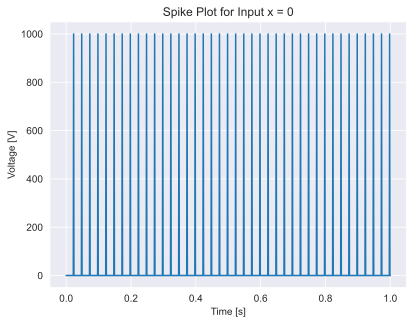

In [18]:
import seaborn as sns
sns.set_style("darkgrid")


ax = sns.lineplot(x = t_array, y = spikes)
ax.set_title("Spike Plot for Input x = 0")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voltage [V]")

The total number of spikes over 1 second is: 143


Text(0, 0.5, 'Voltage [V]')

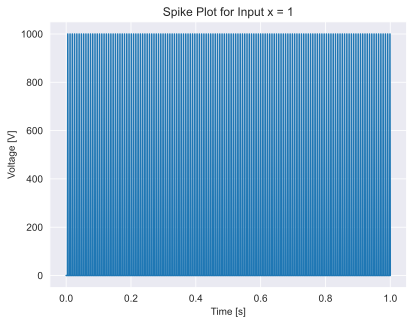

In [19]:
x_1 = np.ones(int(1 / 0.001))
t_array, voltages = simulate_neuron(lif_neuron, x_1, 1)
spikes = v_to_spike(voltages, 1e-3, true_spike=True)
ax = sns.lineplot(x = t_array, y = spikes)
ax.set_title("Spike Plot for Input x = 1")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Voltage [V]")

In [20]:
# create a script to run the simulation
# TODO: consider makingn the top inputs parameters
v_rest = 0
v_curr = 0
v_th = 1
t = 0
dt = 0.00001

t_final = 1
# set to -1 when not running
t_curr_ref = -1

n_spikes = 0
voltages = [v_curr]
t_array = [t]

while t < t_final:
    # check if a neuron is in refractory time
    if t_curr_ref >= 0:
        t_curr_ref += dt
        t += dt
        voltages.append(v_curr)
        t_array.append(t)

        # check if we reached limit
        if t_curr_ref >= tau_ref_s:
            # reset the refractory time to -1
            t_curr_ref = -1
        continue

    # check if a neuron has spiked 
    if v_curr == (1 / dt):
        v_curr = 0
        t_curr_ref = dt
        t += dt
        voltages.append(v_curr)
        t_array.append(t)
        continue


    # calculate the voltage change using neuron J and current v
    # assume that the input is sampled in ms.. so the input at index [ms] is the current value of the input
    input_idx = int(t * 1000)
    # dv_dt = (1 / tau_rc_s) * (lif_neuron.x_to_J(x_t[input_idx]) - v_curr)
    dv_dt = (1 / tau_rc_s) * (lif_neuron.x_to_J(1) - v_curr)


    # get only voltage change by taking time into accont
    dv = dv_dt * dt

    # update the current voltage
    v_curr += dv

    # if it's negative, reset to 0
    if v_curr < v_rest:
        v_curr = v_rest

    # if it's above the voltage threshold, generate a spike - indicate refractory time
    if v_curr >= v_th:
        # generate a discrete impulse
        v_curr = (1 / dt)
        n_spikes += 1

    # update the time to next time stamp
    t += dt
    voltages.append(v_curr)
    t_array.append(t)

print(f"The total number of spikes for x = 0 over 1 second is: {n_spikes}")

The total number of spikes for x = 0 over 1 second is: 150


**b) Discussion.** Does the observed number of spikes in the previous part match the expected number of spikes for $x=0$ and $x=1$? Why or why not? What aspects of the simulation would affect this accuracy?

This simulation expects that at x = 0, we have 40 spikes and at x = 1, we have 150 spikes. For x = 0, we do indeed observe 40 spikes, however, for x=1 we only observe 143 spikes.The errors are likely due to numerical errors, and the discretization of time in the simulation compared to the actual formuals (derived in continuous time). For smaller firing rates such as 40 Hz, the discretization has less effect as the signal is slower. However, for higher firing rates, we sample time less frequently than desired (at x = 1) and may introduce numerical errors. This was tested above, but running the simulation with x = 1 and delta_t = 0.00001, showing 150 spikes observed. Thus, making the discrete time appear more like continuous time fixed the problem. We can also note that there is error as a result of using Euler's method to solve the DE for a time step, which is a cause for the numerical error.

**c) Spike plots for white noise inputs.** Plot the spike output for $x(t)$ generated using your function from part 1.1. Use $\mathtt{T}=1\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=30\,\mathrm{Hz}$. Overlay on this plot $x(t)$.

Text(0, 0.5, 'Signal Value')

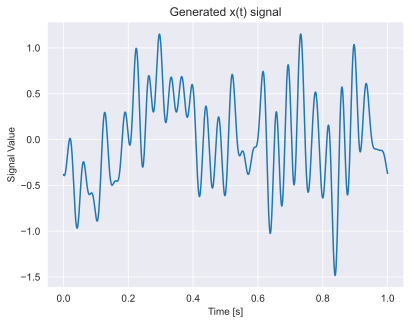

In [21]:
# generate a white noise signal with the config as given above
T = 1
dt = 0.001
rms = 0.5
limit = 30
seed = 8
x_signals = generate_signal_limit(T, dt, rms, limit, seed)
plt.plot(*x_signals["t"])
plt.title("Generated x(t) signal")
plt.xlabel("Time [s]")
plt.ylabel("Signal Value")

In [22]:
x_signals["t"][1].shape

(1000,)

In [23]:
# simulate the neuron with that input
t_array, voltages = simulate_neuron(lif_neuron, x_signals["t"][1], 1)
spikes = v_to_spike(voltages, 1e-3, true_spike=True)

The total number of spikes over 1 second is: 43


(-1.5, 1.5)

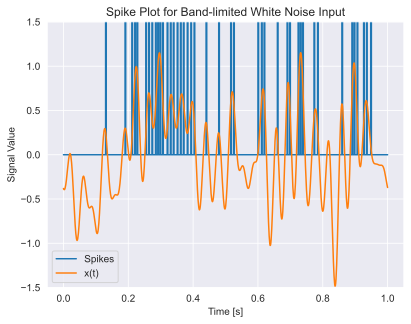

In [24]:
# plot the results, with x(t) overlayed
ax = sns.lineplot(x = t_array, y = spikes, label="Spikes")
sns.lineplot(x = x_signals["t"][0], y = x_signals["t"][1], label="x(t)")
plt.legend()
ax.set_title("Spike Plot for Band-limited White Noise Input")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Value")
plt.ylim(-1.5, 1.5)

**d) Voltage over time.** Using the same $x(t)$ signal as in part *c)*, plot the neuron's voltage over time for the first $0.2$ seconds, along with the spikes over the same time.

(0.0, 0.2)

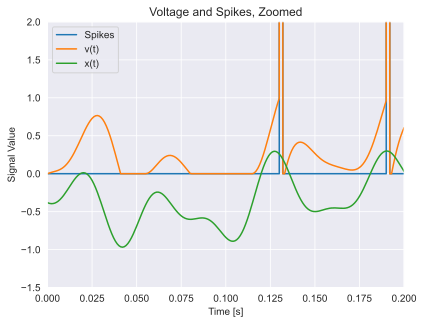

In [25]:
# plot the results, with x(t) overlayed
sns.lineplot(x = t_array, y = spikes, label="Spikes")
ax = sns.lineplot(x = t_array, y = voltages, label="v(t)")
sns.lineplot(x = x_signals["t"][0], y = x_signals["t"][1], label="x(t)")
plt.legend()
ax.set_title("Voltage and Spikes, Zoomed")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Value")
plt.ylim(-1.5, 2.0)
plt.xlim(0.0, 0.2)

### Note: In the plot above, you can't see the spike value on the way down since the voltage v(t) is the same (ie. it is the spike)

**e) 🌟 Bonus question.** How could you improve this simulation (in terms of how closely the model matches actual equation) without significantly increasing the computation time? $0.5$ marks for having a good idea. Up to $1$ mark for actually implementing it and showing that it works.

Instead of using Eulers method for solving the DE, we can use a higher order solution method to get a better numerical solution to increase the accuracy. Of course, higher order methods will increase the computation time, but not as much as if we were to decrease the simulation time step. One possible method to solve DEs more accurately is to use the 4th order Runge-Kutta method. The higher order method will be able to provide more accuracy using the same time step. 

In [26]:
# TODO: Probably won't implement RK4, but do if I have time

# 3. Simulating two spiking neurons

**a) Spike plots for constant inputs.** Plot $x(t)$ and the spiking output for $x(t)=0$ (both neurons should spike at about $40$ spikes per second), as well as (in a separate plot) $x(t)=1$ (one neuron should spike at $\approx 150$ spikes per second, and the other should not spike at all).

In [27]:
# create 2 neurons with the same params but opposite encodings
tau_rc_ms = 20
tau_ref_ms = 2
tau_ref_s = tau_ref_ms * 0.001
tau_rc_s = tau_rc_ms * 0.001
lif_neuron_positive = LIFNeuron1D(40, 1, 150, tau_ref_ms, tau_rc_ms, 1)
lif_neuron_negative = LIFNeuron1D(40, 1, 150, tau_ref_ms, tau_rc_ms, -1)

In [28]:
lif_neuron_negative.x_to_J(1), lif_neuron_negative.e, lif_neuron_negative.alpha, lif_neuron_negative.J_bias

(-1.878439890080906, -1, 3.34179049952376, 1.4633506094428541)

In [29]:
lif_neuron_positive.x_to_J(1), lif_neuron_positive.e, lif_neuron_positive.alpha, lif_neuron_positive.J_bias

(4.805141108966614, 1, 3.34179049952376, 1.4633506094428541)

In [30]:
t_neuron_pos, v_neuron_pos = simulate_neuron(lif_neuron_positive, x_0, 1)

The total number of spikes over 1 second is: 40


In [31]:
t_neuron_neg, v_neuron_neg = simulate_neuron(lif_neuron_negative, x_0, 1)

The total number of spikes over 1 second is: 40


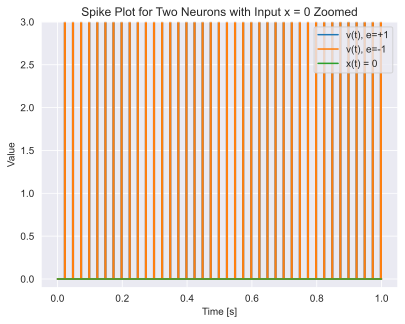

In [32]:
ax = sns.lineplot(x = t_neuron_pos, y = v_to_spike(v_neuron_pos, 1e-3, true_spike=True), label="v(t), e=+1")
sns.lineplot(x = t_neuron_neg, y = v_to_spike(v_neuron_neg, 1e-3, true_spike=True), label="v(t), e=-1")
sns.lineplot(x = t_neuron_pos[:-1], y = x_0, label="x(t) = 0")
ax.set_title("Spike Plot for Two Neurons with Input x = 0 Zoomed")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Value")
ax.set_ylim(-0.1, 3)
plt.legend()

### Note: Both neurons have the same number of spikes and overlap, thus one is not visible as it is directly behind the other

In [33]:
t_neuron_pos_x_1, v_neuron_pos_x_1 = simulate_neuron(lif_neuron_positive, x_1, 1)
t_neuron_neg_x_1, v_neuron_neg_x_1 = simulate_neuron(lif_neuron_negative, x_1, 1)

The total number of spikes over 1 second is: 143
The total number of spikes over 1 second is: 0


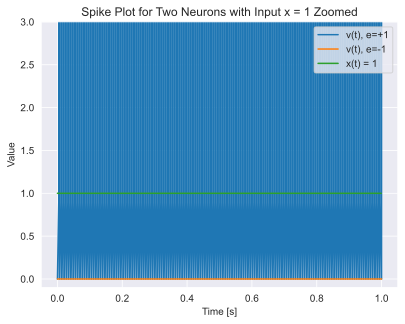

In [34]:
ax = sns.lineplot(x = t_neuron_pos_x_1, y = v_neuron_pos_x_1, label="v(t), e=+1")
sns.lineplot(x = t_neuron_neg_x_1, y = v_neuron_neg_x_1, label="v(t), e=-1")
sns.lineplot(x = t_neuron_pos_x_1[:-1], y = x_1, label="x(t) = 1")
ax.set_title("Spike Plot for Two Neurons with Input x = 1 Zoomed")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Value")
ax.set_ylim(-0.1, 3)
plt.legend()

**b) Spike plots for a sinusodial input.** Plot $x(t)$ and the spiking output for $x(t)=\frac{1}2 \sin(10 \pi t)$.

In [35]:
t = np.linspace(0, 1, 1001)
t.shape

(1001,)

In [36]:
len(t_array)

1001

In [37]:
# create the x signal
x_sinusoid = 0.5 * np.sin(10 * np.pi * t)
x_sinusoid.shape

(1001,)

In [38]:
# simulate both neurons
t_neuron_pos_x_sinu, v_neuron_pos_x_sinu = simulate_neuron(lif_neuron_positive, x_sinusoid, 1)
t_neuron_neg_x_sinu, v_neuron_neg_x_sinu = simulate_neuron(lif_neuron_negative, x_sinusoid, 1)

The total number of spikes over 1 second is: 40
The total number of spikes over 1 second is: 40


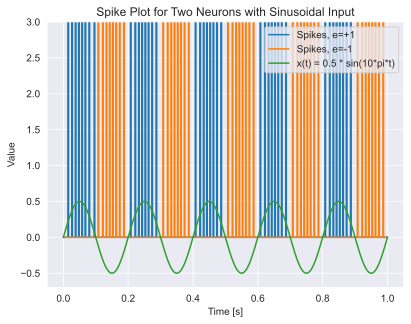

In [39]:
ax = sns.lineplot(x = t_neuron_pos_x_sinu, y = v_to_spike(v_neuron_pos_x_sinu, 1e-3, true_spike=True), label="Spikes, e=+1")
sns.lineplot(x = t_neuron_neg_x_sinu, y = v_to_spike(v_neuron_neg_x_sinu, 1e-3, true_spike=True), label="Spikes, e=-1")
sns.lineplot(x = t, y = x_sinusoid, label="x(t) = 0.5 * sin(10*pi*t)")
ax.set_title("Spike Plot for Two Neurons with Sinusoidal Input")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Value")
ax.set_ylim(-0.7, 3)
plt.legend()

**c) Spike plot for a white noise signal.** Plot $x(t)$ and the spiking output for a random signal generated with your function for question 1.1 with $\mathtt{T}=2\,\mathrm{s}$, $\mathtt{dt}=1\,\mathrm{ms}$, $\mathtt{rms}=0.5$, and $\mathtt{limit}=5\,\mathrm{Hz}$.

Text(0, 0.5, 'Signal Value')

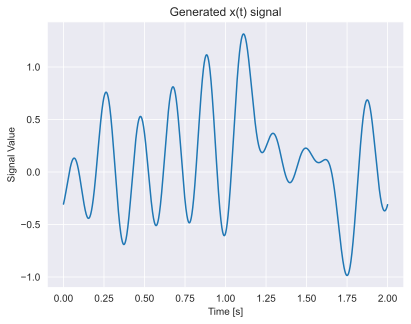

In [40]:
# generate a white noise signal with the config as given above
T = 2
dt = 0.001
rms = 0.5
limit = 5
seed = 10
x_signals = generate_signal_limit(T, dt, rms, limit, seed)
plt.plot(*x_signals["t"])
plt.title("Generated x(t) signal")
plt.xlabel("Time [s]")
plt.ylabel("Signal Value")

The total number of spikes over 2 second is: 110
The total number of spikes over 2 second is: 74


(-1.0, 3.0)

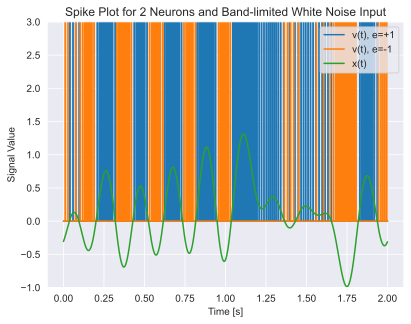

In [41]:
t_pos_noise, v_pos_noise = simulate_neuron(lif_neuron_positive, x_signals["t"][1], 2)
t_neg_noise, v_neg_noise = simulate_neuron(lif_neuron_negative, x_signals["t"][1], 2)

# plot the results, with x(t) overlayed
ax = sns.lineplot(x = t_pos_noise, y = v_to_spike(v_pos_noise, 1e-3, true_spike=True), label="v(t), e=+1")
sns.lineplot(x = t_neg_noise, y = v_to_spike(v_neg_noise, 1e-3, true_spike=True), label="v(t), e=-1")
sns.lineplot(x = x_signals["t"][0], y = x_signals["t"][1], label="x(t)")
plt.legend()
ax.set_title("Spike Plot for 2 Neurons and Band-limited White Noise Input")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Value")
plt.ylim(-1.0, 3)


### Note: Plots get too crazy, plot them separately

(-1.0, 3.0)

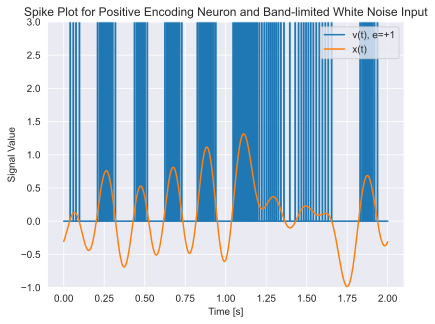

In [42]:
ax = sns.lineplot(x = t_pos_noise, y = v_to_spike(v_pos_noise, 1e-3, true_spike=True), label="v(t), e=+1")
sns.lineplot(x = x_signals["t"][0], y = x_signals["t"][1], label="x(t)")
plt.legend()
ax.set_title("Spike Plot for Positive Encoding Neuron and Band-limited White Noise Input")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Value")
plt.ylim(-1.0, 3)


(-1.0, 3.0)

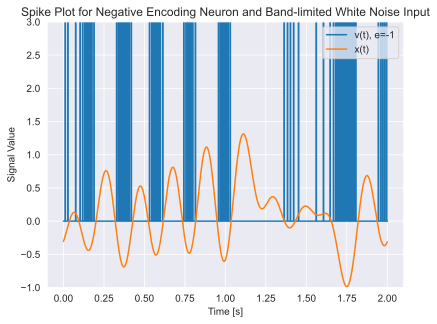

In [43]:
ax = sns.lineplot(x = t_neg_noise, y = v_to_spike(v_neg_noise, 1e-3, true_spike=True), label="v(t), e=-1")
sns.lineplot(x = x_signals["t"][0], y = x_signals["t"][1], label="x(t)")
plt.legend()
ax.set_title("Spike Plot for Negative Encoding Neuron and Band-limited White Noise Input")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Value")
plt.ylim(-1.0, 3)

# 4. Computing an optimal filter

**a) Document the code.** Fill in comments where there are `# !`-signs in the Python code. Make sure that your comments (where this makes sense) describe the semantics of the code and do not just repeat what is obvious from the code itself. Run the function with what you wrote for part 3 above, so that it uses the spike signal generated in 3c).

In [44]:
def compute_optimal_filter(
        # Signal generated from your white noise generator
        x,
        # Fourier coefficients from your white noise generator
        X,
        # Spike train from the previous part
        spikes,
        # Time step size
        dt=1e-3
    ):

    # x and X should (effectively) be 1D-arrays
    assert x.ndim == 1 and X.ndim == 1
    assert x.shape[0] == X.shape[0]

    # ! get the total number of samples at all time steps
    Nt = x.size

    # Make sure that "spikes" is a 2 x Nt array
    assert spikes.ndim == 2
    assert spikes.shape[0] == 2              
    assert spikes.shape[1] == Nt

    # ! get the total time that the simulation runs (in seconds)
    T = Nt * dt

    # ! create time steps which are 0-centered
    ts = np.arange(Nt) * dt - T / 2.0

    # ! create range of frequencies which are also 0 centered (in hz)
    fs = np.arange(Nt) / T - Nt / (2.0 * T)

    # ! convert frequencies to radians
    omega = fs * 2.0 * np.pi

    # ! take the difference between the 2 spike trains
    r = spikes[0] - spikes[1]

    # ! complete a fourier transform on the difference of spike trains; the decoders are opposite
    R = np.fft.fftshift(np.fft.fft(r))

    sigma_t = 25e-3
    # ! create a window filter to smooth the frequnecy domain signal
    W2 = np.exp(-omega**2*sigma_t**2)

    # ! normalize filter to sum 1
    W2 = W2 / sum(W2)

    # ! multiple signal with spike train different; convolution in time domain. Cross power spectrum.
    CP = X*R.conjugate()

    # ! smooth the signal x spike train diff
    WCP = np.convolve(CP, W2, 'same')

    # ! computes (R)^2; magnitude squared of spike train diff. Power spectrum. 
    RP = R*R.conjugate()

    # ! smooth magnitude squared of spike train diff 
    WRP = np.convolve(RP, W2, 'same')

    # ! value of the signal squared, (X)^2
    XP = X*X.conjugate()

    # ! smooths the squared signal
    WXP = np.convolve(XP, W2, 'same')

    # ! computes the optimal filter in frequency domain; smoothed signal x spike train difference over the smoothed spike train squared
    H = WCP / WRP

    # ! time domain version of the optimal filter
    h = np.fft.fftshift(np.fft.ifft(np.fft.ifftshift(H))).real

    # ! reconstructs the signal in frequnecy domain 
    XHAT = H*R

    # ! signal reconstructed in time domain
    xhat = np.fft.ifft(np.fft.ifftshift(XHAT)).real

    return ts, fs, R, H, h, XHAT, xhat, XP, WXP

In [45]:
pos_spikes = v_to_spike(v_pos_noise[:-2], 1e-3)
neg_spikes = v_to_spike(v_neg_noise[:-2], 1e-3)

pos_spikes.shape, pos_spikes.sum(), neg_spikes.shape, neg_spikes.sum()

((2000,), 110, (2000,), 74)

In [46]:
spikes = np.array([pos_spikes, neg_spikes])
spikes.shape

(2, 2000)

In [47]:
x_signals["t"][0].shape

(2000,)

In [48]:
x_signals["t"][1].size

2000

In [49]:
# try to apply it on the output voltage. If it isn't working well, convert the voltage directly to only spikes
ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(x_signals["t"][1], x_signals["w"][1], spikes)

In [50]:
xhat.shape

(2000,)

**b) Optimal filter.** Plot the time and frequency plots of the optimal filter for the signal you generated in question 3c). Make sure to use appropriate limits for the $x$-axis.

(-0.5, 0.5)

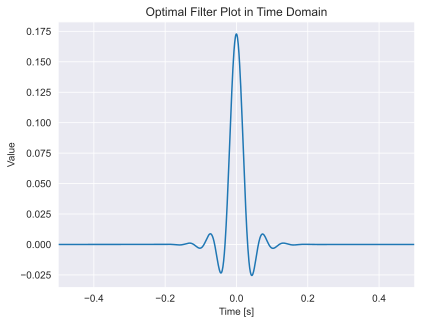

In [51]:
ax = sns.lineplot(x = ts, y = h)
ax.set_title("Optimal Filter Plot in Time Domain")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Value")
ax.set_xlim(-0.5, 0.5)
# plt.legend()

(-50.0, 50.0)

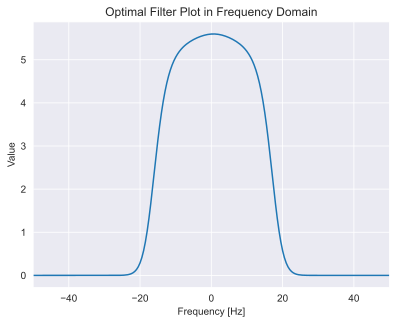

In [52]:
ax = sns.lineplot(x = fs, y = np.abs(H))
ax.set_title("Optimal Filter Plot in Frequency Domain")
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Value")
ax.set_xlim(-50, 50)

**c) Decoded signal.** Plot the $x(t)$ signal, the spikes, and the decoded $\hat x(t)$ value for the signal from 3c).

Text(0, 0.5, 'Signal Value')

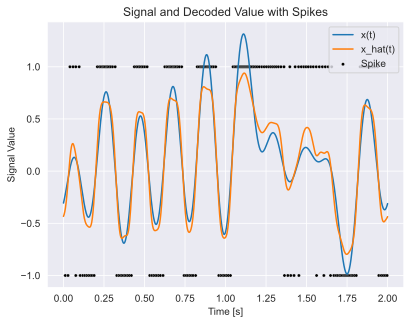

In [53]:
ax = sns.lineplot(x = x_signals["t"][0], y = x_signals["t"][1], label="x(t)")
sns.lineplot(x = x_signals["t"][0], y = xhat, label="x_hat(t)")
sns.scatterplot(x = x_signals["t"][0][pos_spikes == 1], y = pos_spikes[pos_spikes == 1], label="Spike", marker='o', s=10, color="black")
sns.scatterplot(x = x_signals["t"][0][neg_spikes == 1], y = -neg_spikes[neg_spikes == 1], marker='o', s=10, color="black")
plt.legend()
ax.set_title("Signal and Decoded Value with Spikes")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Value")

**d) Power spectra.** Plot the signal $|X(\omega)|$, spike response $|R(\omega)|$, and filtered signal $|\hat X(\omega)|$ power spectra for the signal from 3c).

c:\Users\nicol\miniconda3\envs\schoolEnv\lib\site-packages\matplotlib\cbook\__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


(-30.0, 30.0)

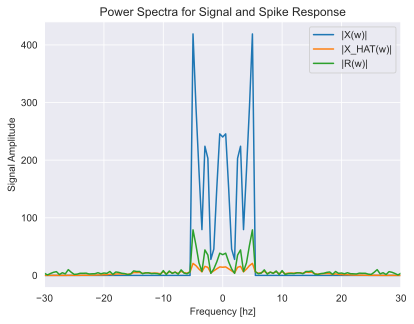

In [54]:
freq_hz = x_signals["w"][0] / (2 * np.pi)
ax = sns.lineplot(x = freq_hz, y = np.sqrt(XP), label="|X(w)|")
sns.lineplot(x = freq_hz, y = np.sqrt(np.abs(XHAT)), label="|X_HAT(w)|")
sns.lineplot(x = freq_hz, y = np.abs(R), label="|R(w)|")
plt.legend()
ax.set_title("Power Spectra for Signal and Spike Response")
ax.set_xlabel("Frequency [hz]")
ax.set_ylabel("Signal Amplitude")

plt.xlim(-30, 30)

**e) Discussion.** How do these spectra relate to the optimal filter?

We can see that both the signal spectra and spike spectra are well aligned with respect to power at the lower frequencies where signal actually exists, and the spike spectra introduces noise compared to the signal at higher frequencies (which makes sense since they are... spikes). We can tell that the optimal filter is a low pass filter in the range of 20 hz. This can be seen by the x hat power spectra as it preserves the spike content at the lower frequencies, but attenutates the noise above 20 hz - exactly as a result of the optimal filter. The optimal filter is optimally filtering the spike noise to create a good power spectra for X hat.

**f) Filter for different signal bandwidths.** Plot the optmial filter $h(t)$ in the time domain when filtering spike trains for white noise signals with different `limit` values of $2\,\mathrm{Hz}$, $10\,\mathrm{Hz}$, and $30\,\mathrm{Hz}$.

The total number of spikes over 2.0 second is: 89
The total number of spikes over 2.0 second is: 92
The total number of spikes over 2.0 second is: 88
The total number of spikes over 2.0 second is: 93
The total number of spikes over 2.0 second is: 94
The total number of spikes over 2.0 second is: 82


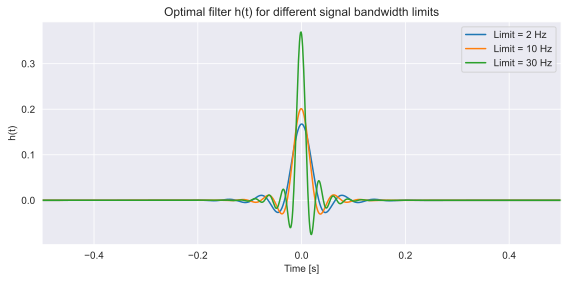

In [55]:
# Parameters for the signals
T = 2.0        # 1 second duration
dt = 0.001     # 1 ms time step
rms = 0.5      # Desired RMS power
seeds = [8, 9, 10]  # Different seeds for each case

# Frequency limits
limits = [2, 10, 30]  # Frequency limits in Hz

# Create a figure for plotting
plt.figure(figsize=(8, 4))

# Loop through each frequency limit
for i, limit in enumerate(limits):
    # Generate the signal for the current limit
    signal_dict = generate_signal_limit(T, dt, rms, limit, seeds[i])

    t_pos_noise, v_pos_noise = simulate_neuron(lif_neuron_positive, signal_dict["t"][1], T)
    t_neg_noise, v_neg_noise = simulate_neuron(lif_neuron_negative, signal_dict["t"][1], T)
    
    pos_spikes = v_to_spike(v_pos_noise[:-2], 1e-3)
    neg_spikes = v_to_spike(v_neg_noise[:-2], 1e-3)
    spikes = np.array([pos_spikes, neg_spikes])
    
    # Compute the optimal filter for the current signal
    ts, fs, R, H, h, XHAT, xhat, XP, WXP = compute_optimal_filter(
        signal_dict["t"][1], signal_dict["w"][1], spikes
    )

    # Plot the optimal filter h(t) for the current frequency limit
    sns.lineplot(x=ts, y=h, label=f'Limit = {limit} Hz')

# Add plot labels and title
plt.xlabel('Time [s]')
plt.ylabel('h(t)')
plt.title('Optimal filter h(t) for different signal bandwidth limits')
plt.legend()
plt.xlim(-0.5, 0.5)

# Display the plot
plt.grid(True)
plt.tight_layout()
plt.show()


**g) Discussion.** Describe the effects on the time plot of the optimal filter as `limit` increases. Why does this happen?

As the limit increases, the time plot of the optimal filter has a larger amplitude at a higher frequency, and dies out quicker. This happens because a higher limit on the input signal requires a higher frequnecy to filter the signal. This is because the optimal filter is directly proportional to the input signal; as the input signal introduces higher frequency components, so will the optimal filter to be able to filter them out (ie. oscillates more rapidly and has a larger amplitude as a result of the increased freqyency of osciallations which die out quicker). 

# Using post-synaptic currents as a filter


**a) Plotting the filter for different $n$.** Plot the normalized $h(t)$ for $n=0$, $1$, and $2$, with $\tau=7\,\mathrm{ms}$.

Area of filter: 0.9999999999999997
Area of filter: 0.9999999999999984
Area of filter: 0.9999999999999996


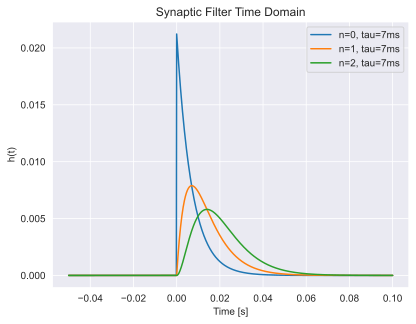

In [56]:
from scipy.integrate import quad

# Define constants
tau = 7e-3
t = np.linspace(-0.05, 0.1, 1000)

# Function to calculate the normalization constant c for any n
def compute_c(n, tau):
    integrand = lambda t: (t**n) * np.exp(-t/tau)
    c, _ = quad(integrand, 0, np.inf)
    return c

# Define the filter function
def h(t, n, tau):
    c = compute_c(n, tau)
    h_t = np.piecewise(
        t,  
        [t < 0, t >= 0],
        [0, lambda t: ((t**n) * np.exp(-t/tau) / c)]
    ) 
    # normalize by dividing by sum of h_t
    # h_t /= np.sum(h_t)
    return h_t

n_values = [0, 1, 2]
for n in n_values:
    h_t = h(t, n, tau)
    print(f"Area of filter: {quad(h, 0, np.inf, args=(n, tau))[0]}")
    sns.lineplot(x=t, y=h_t / np.sum(h_t), label=f'n={n}, tau={int(tau*10**3)}ms')  # Convert time to ms

plt.title('Synaptic Filter Time Domain')
plt.xlabel('Time [s]')
plt.ylabel('h(t)')
plt.legend()
plt.grid(True)
plt.show()

**b) Discussion.** What two things do you expect increasing $n$ will do to $\hat{x}(t)$?

Visually, the time domain plots are smoother as we increase n. Thus, when we convolve the the spikes with a smoother filter, we expect x hat to be smoother as well as the filter will look further in the past to smooth signal. We also see that as n increases, the response at t = 0 is much lower and peaks later - thus we expect a delayed signal for x hat. 

**c) Plotting the filter for different $\tau$.** Plot the normalized $h(t)$ for $\tau=2\,\mathrm{ms}$, $\tau=5\,\mathrm{ms}$, $\tau=10\,\mathrm{ms}$, $\tau=20\,\mathrm{ms}$ with $n = 0$.

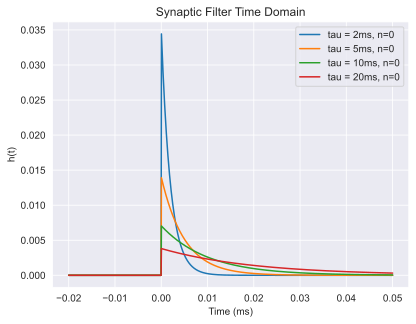

In [57]:
t = np.linspace(-0.02, 0.05, 1000)

# Different tau values
taus = [2e-3, 5e-3, 10e-3, 20e-3]

# Plot the filter for each tau
# plt.figure(figsize=(8, 6))
for tau in taus:
    h_values = h(t, 0, tau)
    plt.plot(t, h_values / np.sum(h_values), label=f'tau = {int(tau*10**3)}ms, n=0')

# Plot settings
plt.title('Synaptic Filter Time Domain')    
plt.xlabel('Time (ms)')
plt.ylabel('h(t)')
plt.legend()
plt.grid(True)
plt.show()


**d) Discussion.** What two things do you expect increasing $\tau$ will do to $\hat{x}(t)$?

Increasing tau decreases the response as t = 0, and also increases the magintude of the filter in the past. Thus, I expect that x_hat will have a weaker response to a spike and also take into account past spikes more (ie. increasing tau will make less 'spiky', more smoothed x_hat).

**e) Decoding a spike-train using the post-synaptic current filter.** Decode $\hat{x}(t)$ from the spikes generated in question 3c) using an $h(t)$ with $n=0$ and $\tau=7\,\mathrm{ms}$. Do this by generating the spikes, filtering them with $h(t)$, and using that as your activity matrix $A$ to compute your decoders. Plot the time and frequency plots for this $h(t)$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

In [58]:
# regenerate signal for 3(c)
# generate a white noise signal with the config as given above
T = 2
dt = 0.001
rms = 0.5
limit = 5
seed = 10
x_signals = generate_signal_limit(T, dt, rms, limit, seed)
# re-simulate spiking neurons from 3(c)
t_pos_noise, v_pos_noise = simulate_neuron(lif_neuron_positive, x_signals["t"][1], 2)
t_neg_noise, v_neg_noise = simulate_neuron(lif_neuron_negative, x_signals["t"][1], 2)
# create the spike trains
pos_spikes = v_to_spike(v_pos_noise[:-2], 1e-3)
neg_spikes = v_to_spike(v_neg_noise[:-2], 1e-3)
spikes = np.array([pos_spikes, neg_spikes])
spikes.shape

The total number of spikes over 2 second is: 110
The total number of spikes over 2 second is: 74


(2, 2000)

(-0.05, 0.2)

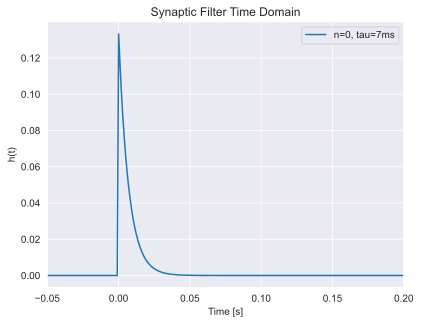

In [59]:
# get the spikes from 3(c) and filter them with h(t) by convolving them
# note that this filter is esentially 0 when t = 0.05 - so sample up to t = 0.1
t = np.linspace(-0.05, 0.95, 1000)
tau = 7e-3
n = 0
h_values = h(t, n, tau)

# we want to use this flipped version of the filter to convolve the spikes with (causal low-pass filter)
ax = sns.lineplot(x=t, y=h_values/np.sum(h_values), label=f'n={n}, tau={int(tau*10**3)}ms') 
ax.set_title("Synaptic Filter Time Domain")
ax.set_xlabel("Time [s]")
ax.set_ylabel("h(t)")
ax.set_xlim(-0.05, 0.2)

(0.0, 100.0)

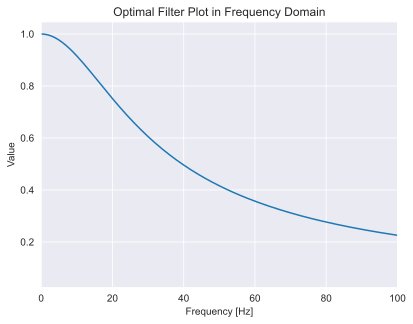

In [60]:
# TODO: plot frequnecy plots for this signal
H = np.fft.fftshift(np.fft.fft(h_values/np.sum(h_values)))
frequencies = np.fft.fftshift(np.fft.fftfreq(len(h_values), d=1e-3))
ax = sns.lineplot(x = frequencies, y = np.abs(H))
ax.set_title("Optimal Filter Plot in Frequency Domain")
ax.set_xlabel("Frequency [Hz]")
ax.set_ylabel("Value")
ax.set_xlim(0, 100)

In [61]:
h_values.size

1000

In [62]:
def calculate_conv_value_at_idx(spike_train, idx, filter):
    # pad the spike train by the length of the filter
    zero_pad = np.zeros_like(filter)

    flipped_filter = np.flip(filter)

    # concat the zero pad
    # print(zero_pad.dtype, spike_train.dtype)
    spikes_padded = np.concatenate((zero_pad, spike_train))
    offset = zero_pad.size

    # multiply the flipped filter at the correct offset, sum and return result
    # note that the filter at idx + offset should be the where the t=0 part of the filter is applied
    # thus, we should apply the last element at idx, and t=0 will be at idx+offset as desired
    element_wise_mult = spikes_padded[idx: idx+offset] * flipped_filter
    return element_wise_mult.sum()

calculate_conv_value_at_idx(spikes[0], 0, h_values)

0.0

In [63]:
# to implement convolution, we must flip the filter in the time domain, slide and multiply
# Initialize the total response (signal)
t = np.arange(0, 2, 0.001)
A = np.zeros_like(spikes)

# Iterate through spike times and add the flipped filter to the response
for i, [pos_val, neg_val] in enumerate(spikes.T):    
    # check if neuron with positive encoding spiked
    if pos_val > 0:
        # put down filter, sum and get value
        A[0][i] = calculate_conv_value_at_idx(spikes[0], i, h_values)
    
    # check if neuron with negative encoding spiked
    if neg_val > 0:
        # put down filter, sum and get value
        A[1][i] = calculate_conv_value_at_idx(spikes[1], i, h_values)

In [64]:
np.unique(A)

array([  0,   3,   4,   8,  11,  13,  14,  19,  28,  29,  30,  39,  40,
        41,  44,  45,  46,  50,  52,  53,  55,  56,  60,  61,  64,  66,
        69,  70,  71,  72,  74,  75,  76,  77,  78,  79,  80,  85,  87,
        91,  92,  94,  96,  98,  99, 102, 105, 107, 115, 120, 121, 123,
       124, 129, 138, 139, 141, 142, 144, 145, 146, 149, 155, 160, 163,
       166, 167, 181, 184, 191, 192, 193, 201, 203, 217, 225, 244])

In [65]:
# compute decoder without accounting for noise using A and the input signal
x_signals["t"][1].shape
D_solve_no_reg = lambda A, x: np.linalg.inv(A @ A.T) @ A @ x.T

D_solve_reg = lambda A, x, sigma: np.linalg.inv(A @ A.T + len(x) * sigma**2 * np.identity(A.shape[0])) @ A @ x.T

D = D_solve_no_reg(A, x_signals["t"][1])
D.shape

(2,)

In [66]:
# finally compute x_hat = D*A
x_hat = D @ A
x_hat.shape

(2000,)

Text(0, 0.5, 'Signal Value')

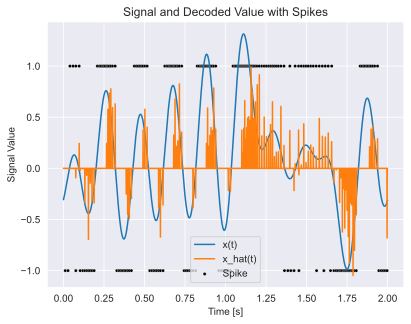

In [67]:
ax = sns.lineplot(x = x_signals["t"][0], y = x_signals["t"][1], label="x(t)")
sns.lineplot(x = x_signals["t"][0], y = x_hat, label="x_hat(t)")
sns.scatterplot(x = x_signals["t"][0][pos_spikes == 1], y = pos_spikes[pos_spikes == 1], label="Spike", marker='o', s=10, color="black")
sns.scatterplot(x = x_signals["t"][0][neg_spikes == 1], y = -neg_spikes[neg_spikes == 1], marker='o', s=10, color="black")
plt.legend()
ax.set_title("Signal and Decoded Value with Spikes")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Value")

**f) Deocding a spike-train representing a low-frequency signal.** Use the same decoder and $h(t)$ as in part e), but generate a new $x(t)$ with $\mathtt{limit}=2\,\mathrm{Hz}$. Plot the $x(t)$ signal, the spikes, and the decoded $\hat{x}(t)$ value.

The total number of spikes over 2 second is: 128
The total number of spikes over 2 second is: 57


Text(0, 0.5, 'Signal Value')

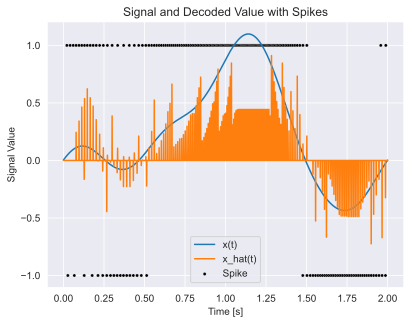

In [68]:
T = 2
dt = 0.001
rms = 0.5
limit = 2
seed = 10
x_signals = generate_signal_limit(T, dt, rms, limit, seed)
# re-simulate spiking neurons from 3(c)
t_pos_noise, v_pos_noise = simulate_neuron(lif_neuron_positive, x_signals["t"][1], 2)
t_neg_noise, v_neg_noise = simulate_neuron(lif_neuron_negative, x_signals["t"][1], 2)
# create the spike trains
pos_spikes = v_to_spike(v_pos_noise[:-2], 1e-3)
neg_spikes = v_to_spike(v_neg_noise[:-2], 1e-3)
spikes = np.array([pos_spikes, neg_spikes])

t = np.arange(0, T, 0.001)
A_2 = np.zeros_like(spikes)

# Iterate through spike times and add the flipped filter to the response
for i, [pos_val, neg_val] in enumerate(spikes.T):    
    # check if neuron with positive encoding spiked
    if pos_val > 0:
        # put down filter, sum and get value
        A_2[0][i] = calculate_conv_value_at_idx(spikes[0], i, h_values)
    
    # check if neuron with negative encoding spiked
    if neg_val > 0:
        # put down filter, sum and get value
        A_2[1][i] = calculate_conv_value_at_idx(spikes[1], i, h_values)

# D_solve_no_reg = lambda A, x: np.linalg.inv(A @ A.T) @ A @ x.T
# D_2 = D_solve_no_reg(A_2, x_signals["t"][1])
x_hat_2 = D @ A_2

ax = sns.lineplot(x = x_signals["t"][0], y = x_signals["t"][1], label="x(t)")
sns.lineplot(x = x_signals["t"][0], y = x_hat_2, label="x_hat(t)")
sns.scatterplot(x = x_signals["t"][0][pos_spikes == 1], y = pos_spikes[pos_spikes == 1], label="Spike", marker='o', s=10, color="black")
sns.scatterplot(x = x_signals["t"][0][neg_spikes == 1], y = -neg_spikes[neg_spikes == 1], marker='o', s=10, color="black")
plt.legend()
ax.set_title("Signal and Decoded Value with Spikes")
ax.set_xlabel("Time [s]")
ax.set_ylabel("Signal Value")

**g) Discussion.** How do the decodings from e) and f) compare? Explain.

The decoding for the lower frequnecy signal appears to be better than the higher frequency signal, as the decoded x_hat is able to keep up with the lower frequency signal, while the other x_hat is generally delayed for the higher frequency signal. This is likely because the post synaptic filter used is able to keep up better with the lower frequency x signal, thus leading to a cleaner representation x_hat. Furthermore, the decoding from (e) may be worse because of the challenge of representing a higher frequency part of the signal with discrete spikes - as the few neuron spikes cannot represent fast changing signals well. 